<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/applied-computational-finance/blob/master/2021/1_notebooks/lesson_1_pricing_with_trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Applied Computational Finance Course: A General Overview

## Course Contents and Learning Outcomes 

This series of lectures is, in a sense, the natural conclusion of the *Advance Computational Finance* course you have just finished. It focuses on a number of topics that have one point in common. They are all related to the need to manage the problem of **early exercise**. In doing this we will present some numerical techniques of general use in the field of computational finance. In the first part we are going to deal with finite difference tools which, in many cases, provide an extremely efficient numerical solution from the computational point of view. But we will soon find a big problem to address. The main weakness of these procedures is that **they do not generalize very easily to the case of multiple risk factors**.

We are therefore faced with a dilemma. On the one hand we have procedures such as the traditional Monte Carlo method by means of which we can easily manage the problem of dimensionality but which do not apply to the case in which an early exercise is allowed. On the other hand, we have finite difference methods which simply deal with the case of anticipated exercise but which cannot easily be extended to the case of multiple dimensions.

In the second part of the course we will solve this dilemma by introducing the solution currently used: the so-called Least Squares Montecarlo Method (Longstaff and Schwartz, 2001).

This is the general structure of the course:

- Pricing with Trees (this notebook)
- Introduction to Finite Difference Methods for Solving Partial Derivative Differential Equations
- The use of Finite Difference in More than One Dimension: the Heston Model example
- Improving Montecarlo Efficiency: Variance Reduction Techniques
- Introduction to the Longstaff-Schwartz Montecarlo Method

## Teaching tools

### Python Language

We have chosen to use the Python programming language. Python is in some way similar to MATLAB, but
contains a lot of modern software engineering tools that have become
standard in the software industry and that should be adopted also for
numerical computing projects. Python is at present also experiencing
an exponential growth in popularity within the scientific computing
community. Some words are in order to describe better some underlying ideas of this course:

- **Program verification**. Program testing, called verification, is a key topic that any good programmer should master. Good verification techniques are indispensable when debugging computer code, but also fundamental for achieving reliable simulations. Two verification techniques will be used in these lessons:  empirical analysis of convergence in problems with exact (analytical) solutions of the differential equation(s) and comparison between different methods (for example binomial tree method and montecarlo simulations).

- **Code-inspired mathematical notation**. Our primary aim is to have a clean and easy-to-read computer code, and we want a close one-to-one relationship between the computer code and mathematical description of the algorithm. This principle calls for a mathematical notation that is governed by the natural notation in the computer code. For this reason we will not pay much attention in this course to the formal aspects that still have their importance from a strictly mathematical point of view.

- **Limited scope**. The aim of these lessons is not to give an overview of a lot of methods for a wide range of mathematical models nor describe in detail the theory underlying, for example, the solution of differential equations, such information can be found in numerous existing, more advanced books. The aim is rather to introduce basic concepts and a thorough understanding of how to think about computing with finite difference methods. We therefore go in depth with only the most fundamental methods and equations. 



### Jupyter Notebooks

A notebook is a document like this one!

A notebook integrates code and its output into a single document that combines visualizations, narrative text, mathematical equations, and other rich media. 

In other words: it's a single document where you can run code, display the output, and also add explanations, formulas, charts, and make your work more transparent, understandable, repeatable, and shareable. 

As part of the open source Project Jupyter, Jupyter Notebooks are completely free. You can download the software on its own, or as part of the Anaconda data science toolkit.

### Google Colab

Colaboratory, or [Colab](https://colab.research.google.com/notebooks/intro.ipynb?hl=en) for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.

Colab notebooks are stored in **Google Drive**, or can be loaded from **GitHub**. Colab notebooks can be shared just as you would with Google Docs or Sheets.

[Here](https://medium.com/@nholmber/google-colaboratory-in-data-science-a8312e8c3443) and [here](https://towardsdatascience.com/colabcode-deploying-machine-learning-models-from-google-colab-54e0d37a7b09) you can find userful tutorials to learn how to use this tool.

### Github Repositories

GitHub is a provider of Internet hosting for software development and version control using Git. It offers the distributed version control and source code management (SCM) functionality of Git, plus its own features. It provides access control and several collaboration features such as bug tracking, feature requests, task management, continuous integration for every project. GitHub offers its basic services free of charge. Free GitHub accounts are commonly used to host open-source projects.

You can find all the teaching materials (notebook, slides, code, etc...) at [this address](https://github.com/polyhedron-gdl) in the repository **applied-computational-finance/2021**. 

Having clearly stated all these points we can start our lessons...

# Pricing with Trees

## Introduction

In this Notebook we introduce tree-based methods for obtaining option prices, which
are especially popular for pricing American options sincemany closed-form formulas
currently available are for European options only. Binomial and trinomial trees can
be used to price many options, including plain vanilla options, but also exotic
options such as barrier options, digital options, and others. Trees
make this possible by mapping out price movements of the underlying security.
These price movements are represented by a grid of equally spaced time steps, with
a series of nodes at each step indicating the price of the security and of the option.

At each node, the security moves up or down by a certain amount, according to a
prespecified probability. The price of the option is evaluated at each node, and then
discounted back to obtain the price at the first node, representing time zero. For
many of these trees, the price of a European option converges to the Black-Scholes
price. Valuation of American options is done by assessing whether early exercise is
profitable at each node in the tree.

The advantage of binomial and trinomial trees is that not only can they can be
used to value just about any type of option, but they are very easy to implement. The
drawback of binomial trees is that the amount of increase or decrease of the security
at each node, as well as the probability of an increase or a decrease, is usually fixed.
In these models, jumps in asset prices are not easily implementable.

There are many different implementation of trees, in this lesson we introduce  the popular Cox, Ross,
and Rubinstein (1979) (CRR) binomial tree, the Leisen and Reimer (1996) binomial
tree and the trinomial tree of Boyle (1986). In the CRR binomial
tree we allow dividends in the form of continuous dividend yield. Finally we show how option sensitivities
(the Greeks) can be extracted from these trees.

## Import Library and Define Utility Functions

First of all we import numpy and matplotlib under the names np and plt, respectively, as this is very common in the Python scientific computing community and a good programming habit.

In [1]:
%matplotlib inline

import math
import scipy
import numpy             as np
import pandas            as pd
import scipy.stats       as ss
import matplotlib
import pylab

from pylab import *
from matplotlib import pyplot as pl

### Python Procedures for Building and Plotting Generic Trees

The code shown in the next cell is used only for the construction and graphical representation of generic trees. Understanding this code is not essential for the use we are going to make and is reported here only for reasons of self-consistency of the notebook code. In any case, the author will be happy to clarify doubts and questions to students who wish to deepen these procedures.

In [2]:
def npoints_per_level(t_type, branching, level):
    if t_type == 'recombining':
        return branching*level-level+1
    else:
        return branching**level
#
#------------------------------------------------------------------------------------- 
#
def general_tree(t_par):
    
    b         = t_par['branching']
    nlevel    = t_par['levels']
    tree_type = t_par['type']
    labels    = t_par['labels']
    step      = 1
    if tree_type != 'recombining': step = b
    
    if b < 10:
        plt.figure(figsize=[10, 8])
        # 
        # calculating tree points coordinates
        #
        if tree_type == 'recombining':
            x       = (b*nlevel-nlevel +1)*[nlevel]
            y       = list(range(b*nlevel - nlevel+1))
            delta   = (y[b-1]-y[0])/2.0
            for i in range(nlevel-1,-1,-1):
                k     = b*i - i + 1 
                for j in range(k):
                    x.append(i)
                    y.append(j + (nlevel-i)*delta)

            x = x[::-1]
            y = y[::-1]  
        else:    
            x       = (b**nlevel)*[nlevel]
            y       = list(range(b**nlevel))
            y_last  = y
            for i in range(nlevel-1,-1,-1):
                k     = b**i
                slide = []
                for j in range(k):
                    new_point = np.average(y_last[j*b:j*b+b])
                    x.append(i)
                    y.append(new_point)
                    slide.append(new_point)
                y_last = slide
            x = x[::-1]
            y = y[::-1]  
        
        #
        # setting labels
        #
        if labels:
            for k in range(len(x)):
                plt.text(x[k]-0.1,y[k]+0.1,labels[k])    
        #
        # plot graph
        #
        imax  = 0
        x_old = [x[0]]
        y_old = [y[0]]
        for i in range(1, nlevel+1):
            npoints = npoints_per_level(tree_type, b, i)
            imax = imax + npoints 
            imin = imax - npoints + 1
            x_new = x[imin:imax+1]
            y_new = y[imin:imax+1]
            for k in range(len(x_old)):
                x_plt = []
                y_plt = []
                for j in range(k*step,k*step+b):
                    x_plt.append(x_old[k])
                    x_plt.append(x_new[j])
                    y_plt.append(y_old[k])
                    y_plt.append(y_new[j])
                    plt.plot(np.array(x_plt), np.array(y_plt), 'bo-', color='blue')
                            
            x_old = x_new
            y_old = y_new

        plt.grid(True)
        plt.show()

In [3]:
def binomial_tree(n, labels = []):
    t_par = {'branching' : 2, 'levels' : n, 'type' : 'recombining', 'labels' : labels}
    general_tree(t_par)    #
#------------------------------------------------------------------------------------- 
#
def trinomial_tree(n, labels = []):
    t_par = {'branching' : 3, 'levels' : n, 'type' : 'recombining', 'labels' : labels}
    general_tree(t_par)    

## Binomial Tree for Option Pricing ##

### What is a binomial tree

The binomial pricing model traces the evolution of the option's key underlying variables in discrete-time. This is done by means of a binomial lattice (Tree), for a number of time steps between the valuation and expiration dates. Each node in the lattice represents a possible price of the underlying at a given point in time. Valuation is performed iteratively, starting at each of the final nodes (those that may be reached at the time of expiration), and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

Option valuation using this method is a three-step process:		
- Price tree generation,
- Calculation of option value at each final node,
- Sequential calculation of the option value at each preceding node.

The tree of prices is produced by working **forward** from valuation date to expiration. At each step, it is assumed that the underlying instrument will move up (with probability $p$) or down (with probability $q = 1 - p$) by a specific factor $u$ or $d$ per step of the tree (where, by definition, $u \ge 1$ and $0 < d \le 1$ )
 So, if $S$ is the current price, then in the next period the price will either be $S_{up} = S \cdot u$ or $S_{down} = S \cdot d$.
 The up and down factors are calculated using the underlying volatility, $\sigma$ , and the time duration of a step, $\Delta t$, measured in years (using the day count convention of the underlying instrument).


### The Cox, Ross and Rubinstein Tree ###

With respect to the definition of $p$, $u$ and $d$ some important assumptions about the behavior of the stochastic process of the underlying stock have to be done. In the following we'll follow the framework set up by Cox, Ross and Rubinstein. 

Let's assume that the stochastic process is continuous as $n \rightarrow \infty$. The parameters $p$, $u$ and $d$ must be chosen in a way to determine the right values of the stock expected return and variance at the end of each interval $\Delta t$.

For each step, the expected future stock price is
\begin{equation}
        E_\pi[S_{t+\Delta t}] =pS_t u + (1-p)S_t d \Rightarrow
        \frac{E_\pi[S_{t+\Delta t}]}{S_t} =p u + (1-p) d 
\end{equation}

and, conditional to $S_t$

\begin{equation}
  E_\pi \left[ \frac{S_{t+\Delta t}}{S_t} \Bigg\vert S_t \right] =p u + (1-p) d 
\end{equation}

The variance of this return is given by

\begin{align*}
\mathit{Var}\>\left[ \frac{S_{t+\Delta t}}{S_t} \Bigg\vert S_t \right] 
&= E_\pi \left[\left( \frac{S_{t+\Delta t}}{S_t} \right)^2 \Bigg\vert S_t \right]  - \left( E_\pi \left[ \frac{S_{t+\Delta t}}{S_t} \Bigg\vert S_t \right] \right)^2\\
& \\
&= [pu^2 +(1-p)d^2] - [pu + (1-p)d]^2 \\
\end{align*}

The Cox, Ross and Rubinstein binomial tree model assume that in the limit $n \rightarrow \infty$, the discrete process must converge to  a geometric brownian motion for the underlying stock price. So the idea is to find values for $u$ and $d$ in order to have

$$\mathit{Var}\>\left[ X_t \vert S_t \right] = \sigma^2 \Delta t$$ 

where $X_t = \frac{S_{t+\Delta t}}{S_t}$

We add an additional assumption in order to obtain a tree that recombines, so that the effect of a down movement followed by an up movement is the same as the effect of an up movement, followed by a down movement.

\begin{equation}
        u=\frac{1}{d}
\end{equation}

With a bit of trivial algebra we find 
\begin{align}
\mathit{Var}\>\left[ X_t \vert S_t \right] & = p u^2 +(1-p)d^2 - p^2u^2-(1-p)^2d^2 - 2p(1-p)ud \notag\\
&= pu^2 (1-p) + p(1-p)d^2 - 2p (1-p)ud \notag\\
&= p(1-p)(u^2+d^2-2ud) \notag\\
&= p(1-p)(u-d)^2
\end{align}

Now it's time to say something more about the probability $p$. For this we will resort to the hypothesis of absence of arbitrage...

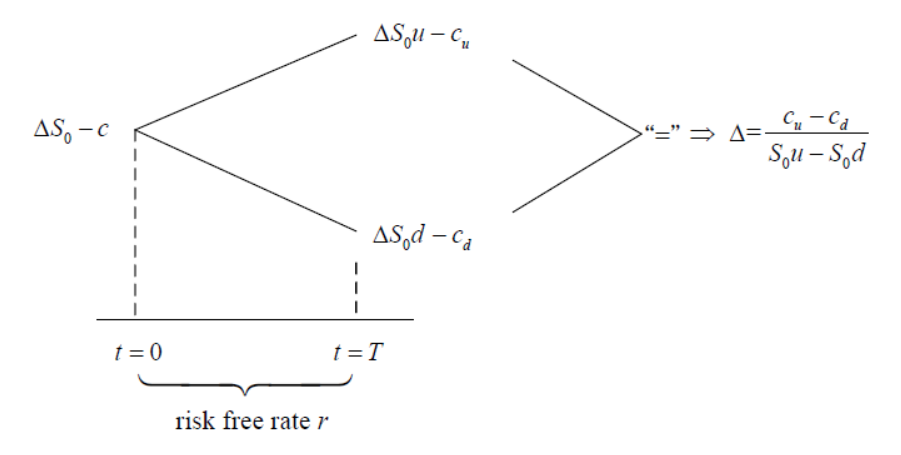

For our purposes it's enough to consider only one period. Let's say that at time $t + \Delta t$ an option on $S$ can assume only two possibile values: either $C_u$ or $C_d$. If we have a portfolio with a long position of $\alpha$ shares of the stock and a short position in the option, the value of our portfolio in the two states will be:

$$\alpha \cdot S_t \cdot u - C_u$$ 
$$\alpha \cdot S_t \cdot d - C_d$$

It is easy to check that if we choose $\alpha$ as 

\begin{equation}
  \alpha = \frac{C_u - C_d}{(u-d)S_t} \sim \frac{\partial C}{\partial S}
\end{equation}

our portfolio will have the same value in both states so it will be a **risk free** portfolio. To preclude the existence of arbitrage the return of our portfolio must be the risk free rate, so in $\Delta t$ we have

$$
P_{t+\Delta t} = e^{r\Delta t}P_t
$$

If $c_t$ is the option value at time $t$ we can write

\begin{equation}
\frac{P_{t+\Delta t}}{P_t} = \frac{S_t \alpha \cdot  u - c_u}{S_t \alpha  - c_t} \> = e^{rT}
\end{equation}

from this we can obtain the value for $c_t$:

\begin{align*}
c_t &= \frac{S_t \cdot \alpha \cdot e^{r\Delta t} + c_u - u \cdot S_t
\cdot \alpha }{e^{r\Delta t}} \notag\\
&= \frac{S_t \cdot \alpha \cdot  (e^{r\Delta t}-u) + c_u}{e^{r\Delta t}}
\end{align*}

Using the previous value for $\alpha$ 

\begin{align}
c_t &= \frac{\frac{c_u-c_d}{u-d}(e^{r\Delta t}-u)+c_u}{e^{r\Delta t}}  \notag\\
  &= \frac{c_ue^{r\Delta t}-c_uu-c_de^{r\Delta t}+c_du+c_uu-c_ud}{e^{r\Delta t}(u-d}  \notag\\
  &= e^{-r\Delta t} \frac{c_u(e^{r\Delta t}-d) + c_d(u-e^{r\Delta t})}{(u-d)} \notag\\
  &= e^{-r\Delta t} \left[ c_u \frac{e^{r\Delta t}-d}{u-d} + c_d \frac{u-e^{r\Delta t}}{u-d} \right] \notag\\
  &= e^{-r\Delta t}\Bigl[ p\cdot c_u + (1-p) \cdot c_d \Bigr] 
\end{align}

In the previous equation

\begin{equation}
  p \equiv \frac{e^{rT}-d}{u-d} \quad \quad 1-p \equiv \frac{u-e^{rT}}{u-d}
\end{equation}

if we assume $d \le r \le d$, $p$ is always greater than zero and less than one showing the basic properties of a probability measure. This is the so called **risk neutral probability**. Now we can compute the variance

\begin{equation}
\mathit{Var}\>\left[ X_t \vert S_t \right] = p(1-p)(u-d)^2
= \sigma^2 \Delta t
\end{equation}

Using the value for $p$, we obtain
\begin{align}
\mathit{Var}\>\left[ X_t \vert S_t \right] &=  p(1-p)(u-d)^2 \notag\\
&= \frac{e^{r\Delta t}-d}{u-d} \left[\frac{u-e^{r\Delta t}}{u-d}\right] (u-d)^2 \notag\\
&= (e^{r\Delta t} -d)(u-e^{r\Delta t})  \notag\\
&= e^{r\Delta t}(u+d) -ud-e^{2r\Delta t}
\end{align}

from the last row, keeping the lower order terms we have
\begin{align}
\mathit{Var}\>\left[ X_t \vert S_t \right] &=
    e^{r\Delta t}(u+d) -ud-e^{2r\Delta t} \notag\\
    &\sim (1+r\Delta t)(u+d)-1-1-2r\Delta t \notag\\
    &= (1+r\Delta t)(u+d-2)
\end{align}

If we choose

\begin{equation}
u = e^{\sigma\sqrt{\Delta t}} , \quad \quad d = \frac{1}{u} = e^{-\sigma\sqrt{\Delta t}}
\end{equation}

up to the first order in $\Delta t$ we have

\begin{equation}
u \sim 1 + \sigma\sqrt{\Delta t} +\frac{1}{2}\sigma^2 \Delta t , \quad \quad d \sim 1-\sigma\sqrt{\Delta t}+\frac{1}{2}\sigma^2 \Delta t
\end{equation}

and finally

\begin{align}
\mathit{Var}\>\left[ X_t \vert S_t \right] &= 
(1+r\Delta t)(u+d-2) \notag\\
&\sim (1+r\Delta t)\Bigl(1 + \sigma\sqrt{\Delta t} +\frac{1}{2}\sigma^2 \Delta t
+1 - \sigma\sqrt{\Delta t} +\frac{1}{2}\sigma^2 \Delta t -2 \Bigr) \notag\\
&=(1+r\Delta t)\Bigl(\sigma^2 \Delta t \Bigr) \notag\\
&\sim \sigma^2 \Delta t + O\left({(\Delta t)^2} \right)
\end{align}

As we have already said, the CRR method ensures that the tree is recombinant, i.e. if the underlying asset moves up and then down $(u,d)$, the price will be the same as if it had moved down and then up $(d,u)$ — here the two paths merge or recombine. This property reduces the number of tree nodes, and thus accelerates the computation of the option price. This property also allows that the value of the underlying asset at each node can be calculated directly via formula, the node-value will be:
$$
S_{n} = S_{0}\cdot u^{N_{u}-N_{d}} = S_0 \cdot u^{N_u} \cdot d^{N_d}
$$

Where $N_u$ is the number of up ticks and $N_d$ is the number of down ticks.

At each final node of the tree — i.e. at expiration of the option—the option value is simply its intrinsic, or exercise, value:

$$
Max [ (S_n - K), 0 ], \quad \text{for a call option}
$$

$$
Max [ (K - S_n), 0 ], \quad \text{for a put option}
$$

Where $K$ is the strike price and $S_n$ is the spot price of the underlying asset at the $n-th$ period.

Once the above step is complete, the option value is then found for each node, **starting at the penultimate time step, and working back to the first node of the tree** (the valuation date) where the calculated result is the value of the option. The "binomial value" is found at each node, using the risk neutrality assumption. Under this assumption,the expected value is calculated using the option values from the later two nodes (Option up and Option down) weighted by their respective risk neutral probabilities — $p$ of an up move in the underlying, and $(1-p)$ of a down move. The expected value is then discounted at $r$, the risk free rate corresponding to the life of the option. 

We finally obtain the iteration formula:
\begin{equation}
c_{t-\Delta t,i}=e^{-r\Delta t}\left[ p \cdot c_{t,i}+(1-p) \cdot c_{t,i+1} \right]
\end{equation}

If exercise is permitted at the node, then **the model takes the greater of binomial and exercise value at the node**:

\begin{equation}
c_{t-\Delta t,i}= \max \left[ e^{-r\Delta t}\left( p \cdot c_{t,i}+(1-p) \cdot c_{t,i+1} \right), S_t - K \right]
\end{equation}

for a call option, and

\begin{equation}
c_{t-\Delta t,i}= \max \left[ e^{-r\Delta t}\left( p \cdot c_{t,i}+(1-p) \cdot c_{t,i+1} \right), K - S_t \right]
\end{equation}

for a put option.

### Implementing CRR Tree in Python

Ok, now the time has come to translate all this theory into python code. Let's start...

First of all, we define some functions for the analytical pricing of an european option according to the Black and Scholes model. The value of a call option for a non-dividend-paying underlying stock in terms of the Black–Scholes parameters is:

\begin{equation}
C(S_{t},t) =N(d_{1})S_{t}-N(d_{2})Ke^{-r(T-t)}
\end{equation}

\begin{equation}
d_{1} ={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)(T-t)\right]
\end{equation}

\begin{equation}
d_{2} = d_{1}-\sigma {\sqrt {T-t}}
\end{equation}

The price of a corresponding put option based on put–call parity is:

\begin{align}
P(S_{t},t)&=Ke^{-r(T-t)}-S_{t}+C(S_{t},t) \notag\\
&=N(-d_{2})Ke^{-r(T-t)}-N(-d_{1})S_{t}
\end{align}

For both:

- $N(\cdot )$ is the cumulative distribution function of the standard normal distribution
- $T-t$ is the time to maturity (expressed in years)
- $S_{t}$ is the spot price of the underlying asset
- $K$ is the strike price
- $r$ is the risk free rate (annual rate, expressed in terms of continuous compounding)
- $\sigma$  is the volatility of returns of the underlying asset


In [49]:
def BlackScholes(payout, S0, K, r, delta, sigma, T):

    def d1(S0, K, r, delta, sigma, T):
        return (np.log(S0/K) + 
                (r - delta + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    def d2(S0, K, r, delta, sigma, T):
        return (np.log(S0 / K) + 
                (r - delta - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    
    if payout==1:
        return S0 * np.exp(-delta * T) * ss.norm.cdf(d1(S0, K, r, delta, sigma, T)) \
               - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, delta, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, delta, sigma, T)) \
               - S0 * np.exp(-delta*T) * ss.norm.cdf(-d1(S0, K, r, delta, sigma, T))

#### European Options Tree

In [50]:
def binomial_tree_european(N, S0, sigma, r, K, Maturity, opt_type = 'put'):
    """
    N      = number of binomial levels
    S0     = initial stock price
    sigma  = factor change of upstate
    r      = risk free interest rate per annum
    K      = strike price
    """
    delta_t     = Maturity/float(N)
    discount    = exp(-r*delta_t)
    #
    # u and d values are chosen according to the CRR model
    #
    u = exp(sigma*sqrt(delta_t))
    d = 1 / u
    p = (exp(r*delta_t)- d) / (u - d)
    q = 1 - p
    #
    # make stock price tree
    # 
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    #
    # Initialize option matrix 
    #
    option = np.zeros([N + 1, N + 1])
    # 
    # Generate option prices recursively
    #
    #
    # We start from the maturity (the binomial tree is a backward 
    # in time algorithm remember?). At maturity we know the value 
    # of the option in all states, it is simply the payoff. In this
    # case the payoff is that of a put option.
    #
    if opt_type == 'put':
        option[:, N] = np.maximum(np.zeros(N + 1), (K - stock[:, N]))
    else:
        option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N]) - K)
        
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (
                discount * (p * option[j, i + 1] + q * option[j + 1, i + 1])
            )
    return [stock, option]

calculating example option price:

In [51]:
S0    = 101.15  # initial stock level
K     =  98.0   # strike price
T     =   1.0   # time-to-maturity
r     =   0.00  # short rate
sigma =   0.05  # volatility
delta =   0.0   # dividend yield

N     =   100

In [52]:
result = binomial_tree_european(N, S0, sigma, r, K, T, 'call') 
print('Option price (binomial tree): ', round(result[1][0][0],3))
opt_bs = BlackScholes(1, S0, K, r, 0.0, sigma, T)
print('Option price (analytic)     : ', round(opt_bs,3))

Option price (binomial tree):  3.945
Option price (analytic)     :  3.946


The "topology" of the tree is described in the following picture

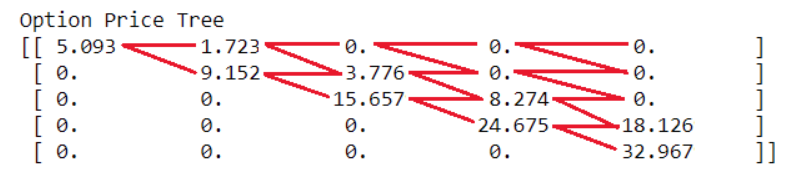

In [53]:
if N <= 5:    
    print('Option Price Tree')
    print(result[1])

In [54]:
if N <= 5:
    print('Stock Tree')
    print(result[0])

In [55]:
if N <= 10:
    m      = result[0]
    o      = result[1]
    labels = []
    for j in range(0,m.shape[0]):
        for i in range(0,j+1):
            labels.append(str("%.2f" % m[i,j]) + '\n' + str("%.2f" % o[i,j]))

    binomial_tree(N, labels)        

#### A Closed Formula for European Options

Actualy in the case of non early exercise (european exercise) we don't need to build the tree in order to price the option. Suppose we have an option with maturity $T$ and strike $K$ to be priced, using a binomial tree
with $n$ time increments on a stock with spot price $S$ with volatility $\sigma$ when the risk
free rate is $r$. As we have shown in the previous box, in the CRR model the stock moves up in increments of $u$
and down in increments of $d = 1/u$ at each time step of length $dt = T/n$. The
probability of an up move is $p = (exp(r \cdot dt) − d)/(u − d)$, and the probability of a
down move is $1 − p$. In this case it easy to find that European call options are priced at the final time step simply as

\begin{equation}
\text{Call} = \exp\left(-rT\right) \sum\limits_{i=0}^n {n\choose{i}} p^i\,(1-p)^{n-i}\, \max\left(Su^id^{n-i} -K,0\right)
\end{equation}

This formula represents the expected value of the
option at the final time step, discounted by the risk-free rate. Since it is in closed
form, it is very easy to implement.

In [39]:
def binomial_model_european(N, S0, sigma, r, K, Maturity):

    discount    = exp(-r*Maturity)
    delta_t     = T/N
    #
    # u and d values are chosen according to the CRR model
    #
    u = exp(sigma*sqrt(delta_t))
    d = 1 / u
    p = (exp(r*delta_t)- d) / (u - d)
    q = 1 - p

    call = 0 
    for i in range(0, N+1):
        call += scipy.special.binom(N, i) * (p**i)*(q**(N-i)) * max(S0*(u**i)*(d**(N-i))-K, 0)
    call = discount*call
    return call

result = binomial_model_european(N, S0, sigma, r, K, T) 
print('Option price (binomial closed): ', round(result,3))

Option price (binomial closed):  3.945


### Convergence Rate ###

When using binomial trees, errors may occur if only a few periods are used. This is
because a binomial tree will only produce one more leaf node (or potential outcome) than the
number of periods used, when infinite outcomes are actually possible. By increasing the number
of periods, we create more possible outcomes that are distributed more continuously.

In [11]:
nn         = range(10,1025,25)
opt_bs     = BlackScholes(-1, S0, K, r, 0.0, sigma, T)
price_bs   = [opt_bs for S in nn]
price_tree = []
for k in nn:
    sys.stdout.write("\r" + 'iter nr : ' + str(k))
    sys.stdout.flush()
    price_tree.append(binomial_model_european(k, S0, sigma, r, K, T)[1][0][0])

iter nr : 1010

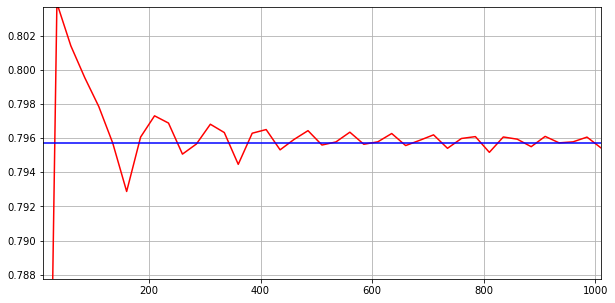

In [12]:
%matplotlib inline

fig = pl.figure(figsize=[10, 5])

pl.xlim(min(nn),max(nn))
pl.ylim(.99 * opt_bs, 1.01 * opt_bs)
pl.plot(nn, price_tree, color='r')
pl.plot(nn, price_bs,   color='b')
pl.grid()
pl.show()


A simple trick to improve convergence behaviour 

In [13]:
nn         = range(10,1025,25)
opt_bs     = BlackScholes(-1, S0, K, r, 0.0, sigma, T)
price_bs   = [opt_bs for S in nn]
price_tree = []
for k in nn:
    sys.stdout.write("\r" + 'iter nr : ' + str(k))
    sys.stdout.flush()
    price_1 = binomial_model_european(k, S0, sigma, r, K, T)[1][0][0]
    price_2 = binomial_model_european(k + 1, S0, sigma, r, K, T)[1][0][0]
    price_tree.append(0.5*(price_1+price_2))

iter nr : 1010

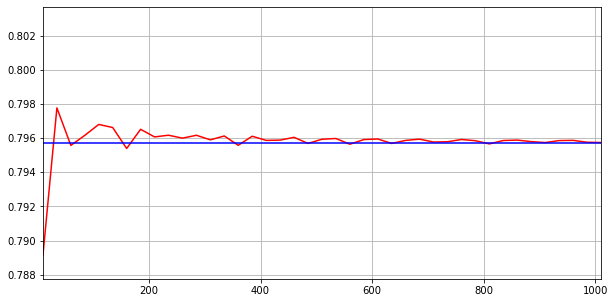

In [14]:
%matplotlib inline

fig = pl.figure(figsize=[10, 5])

pl.xlim(min(nn),max(nn))
pl.ylim(.99 * opt_bs, 1.01 * opt_bs)
pl.plot(nn, price_tree, color='r')
pl.plot(nn, price_bs,   color='b')
pl.grid()
pl.show()

###  Option on Stocks Paying a Continuous Dividend Yield

Consider a stock paying a known dividend yield at rate $q$. The total return from dividends and capital gains in a risk-neutral world is $r$. The dividends provide a return of $q$. Capital gains must therefore provide a return of $r - q$. If the stock starts at $S_0$, its expected value after one time step of length $\Delta t$ must be $S_0 e^{(r-q)\Delta t}$. This means that

$$
p \cdot S_0 \cdot u + (1-p) \cdot S_0 \cdot d = S_0 e^{(r-q)\Delta t}
$$

so that

\begin{equation}
p = \frac{e^{(r-q)\Delta t} - d}{u - d}
\end{equation}

As in the case of options on non-dividend-paying stocks, we match volatility by setting $u = e^{\sigma \sqrt{\Delta t}}$ and $d = 1/u$. This means that we can use the same equations as before except that we sobstitute $r$ with $r - q$.


### Greek Letters

#### Delta

It will be recalled that the delta $\Delta$ of an option is the rate of change of its price with respect to the underlying stock price. It can be calculated as

$$
\frac{\Delta f}{\Delta S}
$$

where $\Delta S$ is a small change in the asset price and $\Delta f$ is the corresponding small change
in the option price. At time $\Delta t$, we have an estimate $f_{1,1}$ for the option price when the
asset price is $S_0 \cdot u$ and an estimate $f_{1,0}$ for the option price when the asset price is $S_0 \cdot d$.
This means that, when $\Delta S = S_0(u - d)$, $\Delta f = f_{1,1} - f_{1,0}$. Therefore an estimate of
delta at time $\Delta t$ is

\begin{equation}
\Delta \sim \frac{f_{1,1} - f_{1,0}}{S_0(u - d)}
\end{equation}

#### Gamma

To determine gamma ($\Gamma$) note that we have two estimates of $\Delta$ at time $2 \Delta t$. When $S = (S_0 u^2 + S_0)/2$ (halfway between the second and third node), delta is 
$(f_{2,2} - f_{2,1})/(S_0 u^2 - S_0)$. When $S = (S_0 + S_0d^2)/2$ (halfway between the first and second node), delta is $(f_{2,1} - f_{2,0})/(S_0 + S_0d^2)$. The difference between the two values of $S$ is $h$ where

$$
h = \frac{1}{2} \left( S_0 u^2 - S_0 d^2 \right)
$$

Gamma is the change in delta divided by $h$:

\begin{equation}
\Gamma \sim \frac{\left[(f_{2,2} - f_{2,1})/(S_0 u^2 - S_0) \right] - \left[(f_{2,1} - f_{2,0})/(S_0 + S_0d^2) \right]}{h}
\end{equation}

These procedures provide estimates of delta at time $\Delta t$ and of gamma at time $2\Delta t$. In practice, they are usually used as estimates of delta and gamma at time zero as well.

#### Theta
A further hedge parameter that can be obtained directly from the tree is theta ($\Theta$).
This is the rate of change of the option price with time when all else is kept constant.
The value of the option at time zero is $f_{0,0}$ and at time $2\Delta t$ it is $f_{2,1}$. An estimate of
theta is therefore

\begin{equation}
\Theta \sim \frac{f_{2,1} - f_{0,0}}{2 \Delta t}
\end{equation}

#### Vega

Vega can be calculated by making a small change, $\Delta \sigma$, in the volatility and constructing
a new tree to obtain a new value of the option. (The number of time steps should be
kept the same.) The estimate of vega is

\begin{equation}
\mathcal{V} = \frac{f^\star - f}{\Delta \sigma}
\end{equation}

where $f$ and $f^\star$ are the estimates of the option price from the original and the new tree, respectively. Rho can be calculated similarly

### American Options ###

The method used to evaluate an American style derivative is very similar to that for the European option except that it is necessary to incorporate the early exercise feature. In the case of American options the value of the option at any node in the binomial tree is the greater between the value calculated by backward induction (the **continuation value**) and the payoff from early exercise. Specifically at time $t$ and node $i$ 

\begin{equation}
c_t^i = max \left[ 
max \left(K - S_t^i,o \right),  
e^{-rt}\left(p c_{t+1}^u + (1-p)c^d_{t+1}\right) 
\right]
\end{equation}

This is repeated until you return to the final node at the present time. This final node is the price of your options contract.

In [ ]:
def binomial_model_american(N, S0, sigma, r, K, Maturity, opt_type = 'put'):
    """
    N      = number of binomial iterations
    S0     = initial stock price
    sigma  = factor change of upstate
    r      = risk free interest rate per annum
    K      = strike price
    """
    delta_t     = Maturity/float(N)
    discount    = exp(-r*delta_t)
    u           = exp(sigma*sqrt(delta_t))
    d           = 1 / u
    p           = (exp(r*delta_t)- d) / (u - d)
    q           = 1 - p

    # make stock price tree
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Generate option prices recursively
    option = np.zeros([N + 1, N + 1])
    if opt_type  == 'put':
        option[:, N] = np.maximum(np.zeros(N + 1), (K - stock[:, N]))
    else:
        option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N]) - K)
        
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (
                discount * (p * option[j, i + 1] + q * option[j + 1, i + 1])
            )
            #
            # dealing with early exercise
            #
            if opt_type == 'put':
                exercise     = np.maximum(0, K - stock[j, i])  
            else:
                exercise     = np.maximum(0, stock[j, i] - K)
                
            option[j, i] = np.maximum(exercise, option[j, i])

    return [stock, option]

In [ ]:
result = binomial_model_american(N, S0, sigma, r, K, T, 'put')

print('Option price (binomial tree): ', result[1][0][0])

opt_bs = BlackScholes('P', S0, K, r, 0, sigma, T)
print('Option price (analytic)     : ', opt_bs)

Option price (binomial tree):  0.8006738876025329
Option price (analytic)     :  0.7957202919380961


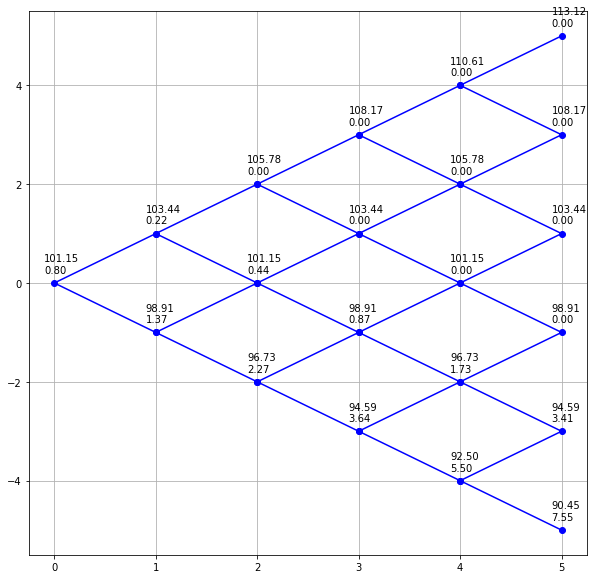

In [ ]:
if N <= 10:
    m      = result[0]
    o      = result[1]
    labels = []
    for j in range(0,m.shape[0]):
        for i in range(0,j+1):
            labels.append(str("%.2f" % m[i,j]) + '\n' + str("%.2f" % o[i,j]))

    binomial_tree(N, labels)     

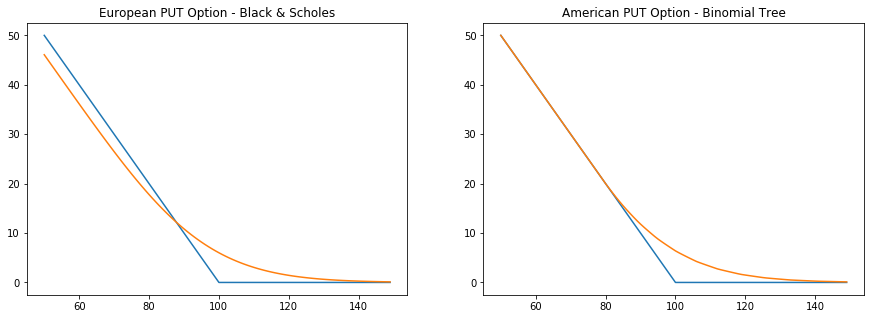

In [ ]:
K     = 100.0   # strike price
T     =   1     # time-to-maturity
r     =   0.04  # short rate
sigma =   0.20  # volatility
delta =   0.0   # dividend yield

S      = np.arange(50, 150, 1.0)
PE     = BlackScholes(-1, S, K, r, delta, sigma, T)
PA     = [binomial_model_american(50, s, sigma, r, K, T)[1][0][0] for s in S]
payP   = np.maximum(K-S,0)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('European PUT Option - Black & Scholes')
plt.plot(S,payP)
plt.plot(S,PE)

plt.subplot(122)
plt.title('American PUT Option - Binomial Tree')
plt.plot(S,payP)
plt.plot(S,PA)


### The Leisen-Reimer Binomial Tree

As the convergence of the binomial tree based value to the limit is not monotone but rather oscillatory, the goal here is to achieve maximum precision with a minimum number of time steps $N$. However, one can not expect that decreasing the step size $\Delta t = T/N$ will yield a more precise value when using the methods by Cox-Ross-Rubinstein. For this reason Leisen and Reimer developed a method in which the parameters $u$, $d$ and $p$ of the binomial tree can be altered in order to get better
convergence behavior. Instead of choosing the parameters $p$, $u$ and $d$ to get convergence to the normal distribution Leisen-Reimer suggest to use inversion formulae reverting the standard method – they use normal approximations to
determine the binomial distribution $B(n, p)$.

In this section we implement the two Peizer-Pratt inversions suggested in their paper. These two methods work for an odd number of steps only. Leisen and Reimer use subscripts on the CRR binomial tree parameters to emphasize their dependence on $n$, the number of time steps. Hence, they denote

$$
u_n = exp\left(\sigma/\sqrt{T/n}\right), \quad d_n = 1/u_n, \quad r_n = exp\left(rT/n\right)
$$

and the risk-neutral probability of a up move as $p_n = (r_n − d_n)/(u_n − d_n)$. The parameters of their new binomial model
are $u = r_n p^\prime/p$ and $d = (r_n − pu)/(1 − p)$, where $p^\prime = h^{−1}(d1)$ and $p = h^{−1}(d2)$. The two inversion formulas $h^{−1}(z)$ for the probabilities that they use are the Peizer-Pratt method 1:

\begin{equation}
h^{-1}(z) = \frac{1}{2} + \frac{\text{Sign}(d_1)}{2}
\sqrt{1 - \exp{\left[\left(\frac{z}{n+\frac{1}{3}} \right)^2 \left( n + \frac{1}{6}\right)\right]}}
\end{equation}

and the Peizer-Pratt method 2:

\begin{equation}
h^{-1}(z) = \frac{1}{2} + \frac{\text{Sign}(d_1)}{2}
\sqrt{1 - \exp{\left[\left(\frac{z}{n+\frac{1}{3}
+ \frac{0.1}{n+1}} \right)^2 \left( n + \frac{1}{6}\right)\right]}}
\end{equation}

where as usual

$$
d_1 = \frac{\log(S/K) + (r+\sigma^2/2)T}{\sigma \sqrt{T}}
$$

and $d_2$ is identical to $d_1$ except that $r + \sigma^2/2$ is replaced by $r − \sigma^2/2)$. The tree is
constructed exactly as the CRR tree, but using the Leisen Reimer parameters $p$, $u$,
and $d$ defined above.



In [40]:
from numpy import sign

In [41]:
def binomial_model_european_LR(N, S0, sigma, r, K, T, method, opt_type = 'put'):
    """
    N      = number of binomial levels
    S0     = initial stock price
    sigma  = factor change of upstate
    r      = risk free interest rate per annum
    K      = strike price
    """
    if N % 2 == 0: N = N + 1

    dt       = T / N
    discount = exp(-r * dt)

    # Leisen-Reimer Tree Parameters

    d1 = (log(S0 / K) + (r + sigma ** 2 / 2) * T) / sigma / sqrt(T)     # D Plus
    d2 = (log(S0 / K) + (r - sigma ** 2 / 2) * T) / sigma / sqrt(T)     # D Minus

    u_n = exp( sigma * sqrt(dt))
    d_n = exp(-sigma * sqrt(dt))
    r_n = exp(r * dt)

    term1 = (d1 / (N + 1 / 3.0 - (1 - method) * 0.1 / (N + 1))) ** 2 * (N + 1 / 6)
    pp = 0.5 + sign(d1) * 0.5 * sqrt(1 - exp(-term1))

    term1 = (d2 / (N + 1 / 3 - (1 - method) * 0.1 / (N + 1))) ** 2 * (N + 1 / 6)
    p = 0.5 + sign(d2) * 0.5 * sqrt(1 - exp(-term1))
    q = 1 - p
    #
    u = r_n * pp / p
    d = (r_n - p * u) / (1 - p)
    #
    # make stock price tree
    # 
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    #
    # Initialize option matrix 
    #
    option = np.zeros([N + 1, N + 1])
    # 
    # Generate option prices recursively
    #
    #
    # We start from the maturity (the binomial tree is a backward 
    # in time algorithm remember?). At maturity we know the value 
    # of the option in all states, it is simply the payoff. In this
    # case the payoff is that of a put option.
    #
    if opt_type == 'put':
        option[:, N] = np.maximum(np.zeros(N + 1), (K - stock[:, N]))
    else:
        option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N]) - K)
        
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (
                discount * (p * option[j, i + 1] + q * option[j + 1, i + 1])
            )
    return [stock, option]

In [42]:
result = binomial_model_european_LR(N, S0, sigma, r, K, T, 2) 
print('Option price (binomial tree): ', round(result[1][0][0],3))
opt_bs = BlackScholes(-1, S0, K, r, 0.0, sigma, T)
print('Option price (analytic)     : ', round(opt_bs,3))

Option price (binomial tree):  0.796
Option price (analytic)     :  0.796


In [43]:
nn         = range(1,250,1)
opt_bs     = BlackScholes(-1, S0, K, r, 0.0, sigma, T)
price_bs   = [opt_bs for S in nn]
price_tree = []
for k in nn:
    sys.stdout.write("\r" + 'iter nr : ' + str(k))
    sys.stdout.flush()
    price_tree.append(binomial_model_european_LR(k, S0, sigma, r, K, T, 2)[1][0][0])

iter nr : 249

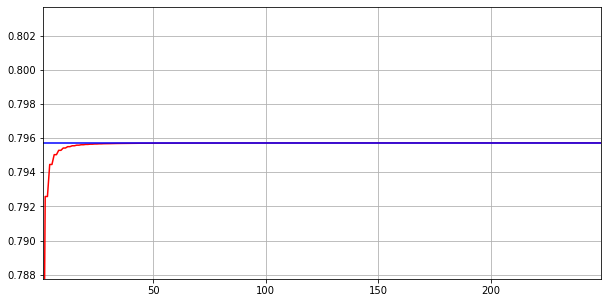

In [44]:
%matplotlib inline

fig = pl.figure(figsize=[10, 5])

pl.xlim(min(nn),max(nn))
pl.ylim(.99 * opt_bs, 1.01 * opt_bs)
pl.plot(nn, price_tree, color='r')
pl.plot(nn, price_bs,   color='b')
pl.grid()
pl.show()


# Trinomial Trees

Under the trinomial method, the underlying stock price is modeled as a recombining tree, where, at each node the price has three possible paths: an up, down and stable or middle path.

These values are found by multiplying the value at the current node by the appropriate factor $u$, $d$ or $m$ where

$$
u = e^{\sigma \sqrt{2 \Delta t}}, \> d = e^{-\sigma \sqrt{2 \Delta t}}, \>m = 1
$$

and the corresponding probability are:

$$
 p_u = \left(\frac{e^{(r - q)  \Delta t / 2}- e^{-\sigma\sqrt {\Delta t/2}}}{e^{\sigma\sqrt {\Delta t/2}}- e^{-\sigma\sqrt {\Delta t/2}}}\right)^2 ,\quad
p_d = \left(\frac{e^{\sigma\sqrt {\Delta t/2}}-e^{(r - q)  \Delta t / 2}}{e^{\sigma\sqrt {\Delta t/2}}- e^{-\sigma\sqrt {\Delta t/2}}}\right)^2
$$
and $p_m = 1 - (p_u + p_d)$

As with the binomial model, these factors and probabilities are specified so as to ensure that the price of the underlying evolves as a martingale, while the moments are matched to those of the log-normal distribution. Note that for $p_u$ , $p_d$ and $p_m$  to be in the interval $(0,1)$ the following condition on $\Delta t$  has to be satisfied:

$$
 \Delta t < 2\frac{\sigma^2}{(r-q)^2} .
$$

In [45]:
from math import exp, sqrt
import numpy as np

In [46]:
c     = -1   # c = 1 for a call, = -1 for a put 
T     = 1
n     = 5
r     = 0
K     = 100
sigma = 0.05
s0    = 101.15

In [47]:
s = np.zeros([2*(n + 1), n + 1])
o = np.zeros([2*(n + 1), n + 1])

In [48]:
dt  = T / n

Df = exp(-r * dt)

u  = exp(sigma * sqrt(2 * dt))
d  = exp(-sigma * sqrt(2 * dt))

dt2 = dt/2.0
sdt2 = sigma * sqrt(dt2)

pu = ((exp(r * dt2) - exp(-sdt2)) / (exp(sdt2) - exp(-sdt2))) ** 2
pd = ((exp(sdt2) - exp(r * dt2)) / (exp(sdt2) - exp(-sdt2))) ** 2
pm = 1 - pu - pd

Now we set the final condition at expiration

In [ ]:
for k in range(2*n + 1):
    s[k, n] = s0 * u ** max(k - n, 0) * d ** max(n * 2 - n - k, 0)
    o[k, n] = max(c*(s[k, n] - K), 0.0)

In [ ]:
shape(s)

(12, 6)

Calcolation loop

In [ ]:
for j in range(n - 1, -1, -1):
    for i in range(2*j + 1):
        s[i, j] = s0 * u ** max(i - j, 0) * d ** max(j * 2 - j - i, 0)
        o[i, j] = (pu * o[i + 2, j + 1] + pm * o[i + 1, j + 1] + pd * o[i, j + 1]) * Df

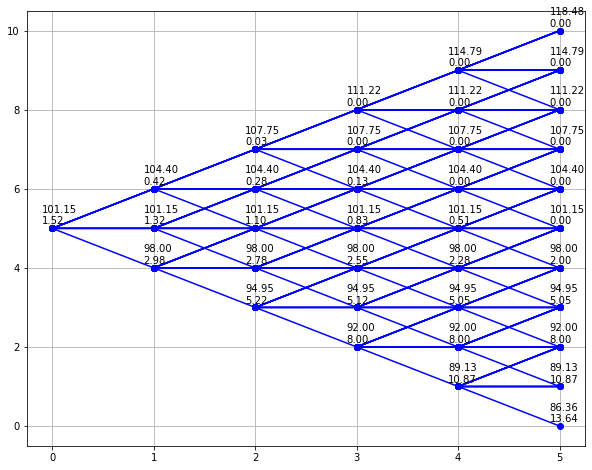

In [ ]:
if n < 10:
    labels = []
    for x in range(0, n + 1):
        npoints = 3 * x - x + 1
        for y in range(npoints - 1, -1, -1):
            labels.append(str("%.2f" % s[y, x]) + '\n' + str("%.2f" % o[y, x]))

    trinomial_tree(n, labels)     

Comparing results

In [ ]:
result = binomial_model_european(n, s0, sigma, r, K, T) 
blsh_price = BlackScholes(-1, s0, K, r, 0, sigma, T)
trtr_price = o[0,0]
bitr_price = result[1][0][0]

print("Option Price (Black and Scholes) = %s" % str(round(blsh_price,4)))
print("Option price (Binomial tree)     = %s" % str(round(bitr_price,4)))
print("Option Price (Trinomial Tree)    = %s" % str(round(trtr_price,4)))

Option Price (Black and Scholes) = 1.4832
Option price (Binomial tree)     = 1.4974
Option Price (Trinomial Tree)    = 1.4816


In [ ]:
def trinomial_model_european(n, s0, sigma, r, K, T, opt_type = 'put'):
    '''
        Description
    '''
    c = -1
    if opt_type == 'call': c = 1
    #
    # Initialize stock and option matrices
    #
    s = np.zeros([2*(n + 1), n + 1])
    o = np.zeros([2*(n + 1), n + 1])    
    #
    # Calculation of transition probabilities
    #
    dt   = T / n
    Df   = exp(-r * dt)
    #
    u    = exp(sigma * sqrt(2 * dt))
    d    = exp(-sigma * sqrt(2 * dt))
    #
    dt2  = dt/2.0
    sdt2 = sigma * sqrt(dt2)
    #
    pu   = ((exp(r * dt2) - exp(-sdt2)) / (exp(sdt2) - exp(-sdt2))) ** 2
    pd   = ((exp(sdt2) - exp(r * dt2)) / (exp(sdt2) - exp(-sdt2))) ** 2
    pm   = 1 - pu - pd
    #
    # Setting final conditions
    #
    for k in range(2*n + 1):
        s[k, n] = s0 * u ** max(k - n, 0) * d ** max(n * 2 - n - k, 0)
        o[k, n] = max(c*(s[k, n] - K), 0.0)
    #
    # Calculation loop
    #
    for j in range(n - 1, -1, -1):
        for i in range(2*j + 1):
            s[i, j] = s0 * u ** max(i - j, 0) * d ** max(j * 2 - j - i, 0)
            o[i, j] = (pu * o[i + 2, j + 1] + pm * o[i + 1, j + 1] + pd * o[i, j + 1]) * Df
            
    return o[0, 0]        

### Convergence Rate

In [ ]:
nn         = range(10,1000,5)
opt_bs     = BlackScholes(-1, S0, K, r, 0.0, sigma, T)
price_bs   = [opt_bs for S in nn]
price_tree = []
for k in nn:
    sys.stdout.write("\r" + 'iter nr : ' + str(k))
    sys.stdout.flush()
    price_tree.append(trinomial_model_european(k, s0, sigma, r, K, T))

iter nr : 995

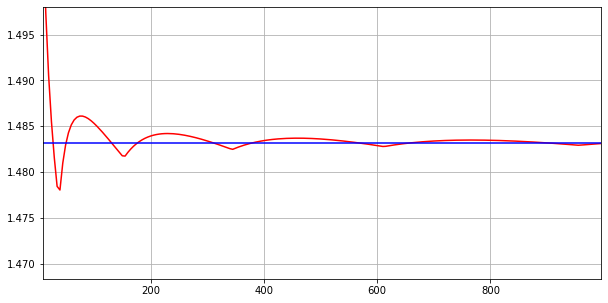

In [ ]:
%matplotlib inline

fig = pl.figure(figsize=[10, 5])

pl.xlim(min(nn),max(nn))
pl.ylim(.99 * opt_bs, 1.01 * opt_bs)
pl.plot(nn, price_tree, color='r')
pl.plot(nn, price_bs,   color='b')
pl.grid()
pl.show()

# References #

*John C. Hull*, **Option, Futures and Other Derivatives**, 6th Edition, Prentice Hall.

*Leisen, D. and Reimer, M.* (1996). **Binomial Models For Option Valuation - Examining and Improving
Convergence**. Applied Mathematical Finance 3 pp. 319-346.

*Pietro Rossi*, **A Short Course in Computational Finance**, Lecture Notes

*Fabrice D. Rouah and Gregory Vainberg*, **Option Pricing Models & Volatility Using Excel-VBA**, Wiley Finance, 2007.

*Paul Wilmott*, **Derivatives, The Theory and Practice of Financial Engineering**, University Edition.

*Paul Wilmott, Sam Howison and Jeff Dewinne*, **The Mathematics of Financial Derivatives, A Student Introduction**, Cambridge University Press.